In [58]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report


In [59]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")

In [60]:
print("Dataset Shape:", red_wine.shape)
print(red_wine.head())

Dataset Shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

In [61]:
print("Missing Values:\n", red_wine.isnull().sum())
print("Duplicate Rows:", red_wine.duplicated().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicate Rows: 240


In [62]:
def quality_to_class(q):
    if q <= 4:
        return 0   # Low
    elif q <= 6:
        return 1   # Medium
    else:
        return 2   # High

red_wine["quality_class"] = red_wine["quality"].apply(quality_to_class)

print(red_wine["quality_class"].value_counts())


quality_class
1    1319
2     217
0      63
Name: count, dtype: int64


In [63]:
red_wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
30,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,10.100000,5,1
1426,7.7,0.230,0.37,1.8,0.046,23.0,60.0,0.99710,3.41,0.71,12.100000,6,1
1362,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,1
814,12.6,0.410,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.300000,6,1
1304,7.6,0.790,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,9.200000,5,1
1160,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.100000,7,2
262,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.000000,5,1
762,8.8,0.700,0.00,1.7,0.069,8.0,19.0,0.99701,3.31,0.53,10.000000,6,1
252,11.1,0.350,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.500000,5,1
1344,11.5,0.420,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.000000,5,1


In [64]:
X = red_wine.drop(["quality", "quality_class"], axis=1)
y = red_wine["quality_class"]


In [65]:
# Count of each class
class_counts = y.value_counts()

# Percentage of each class
class_percentage = y.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentage (%):\n", class_percentage.round(2))


Class Counts:
 quality_class
1    1319
2     217
0      63
Name: count, dtype: int64

Class Percentage (%):
 quality_class
1    82.49
2    13.57
0     3.94
Name: proportion, dtype: float64


In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (1279, 11)
Testing Size: (320, 11)


In [68]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred_lr = lr_model.predict(X_test)


In [70]:
# Convert regression output → class
y_pred_lr_class = np.round(y_pred_lr).astype(int)
y_pred_lr_class = np.clip(y_pred_lr_class, 0, 2)

print("Linear Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr_class))

print(classification_report(
    y_test, y_pred_lr_class,
    target_names=["Low", "Medium", "High"]
))

Linear Regression Accuracy: 0.83125
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        13
      Medium       0.83      0.99      0.91       264
        High       0.67      0.09      0.16        43

    accuracy                           0.83       320
   macro avg       0.50      0.36      0.36       320
weighted avg       0.78      0.83      0.77       320



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       random_state=42)

In [72]:

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print(classification_report(
    y_test, y_pred_rf,
    target_names=["Low", "Medium", "High"]
))

Random Forest Accuracy: 0.878125
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        13
      Medium       0.90      0.96      0.93       264
        High       0.75      0.63      0.68        43

    accuracy                           0.88       320
   macro avg       0.55      0.53      0.54       320
weighted avg       0.84      0.88      0.86       320



In [73]:
svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    class_weight="balanced"
)

svm_model.fit(X_train, y_train)


SVC(C=10, class_weight='balanced')

In [74]:
y_pred_svm = svm_model.predict(X_test)


In [75]:
print("SVM Accuracy:",
      accuracy_score(y_test, y_pred_svm))

print(classification_report(
    y_test,
    y_pred_svm,
    target_names=["Low", "Medium", "High"]
))


SVM Accuracy: 0.7625
              precision    recall  f1-score   support

         Low       0.21      0.46      0.29        13
      Medium       0.94      0.77      0.84       264
        High       0.47      0.81      0.59        43

    accuracy                           0.76       320
   macro avg       0.54      0.68      0.58       320
weighted avg       0.84      0.76      0.79       320



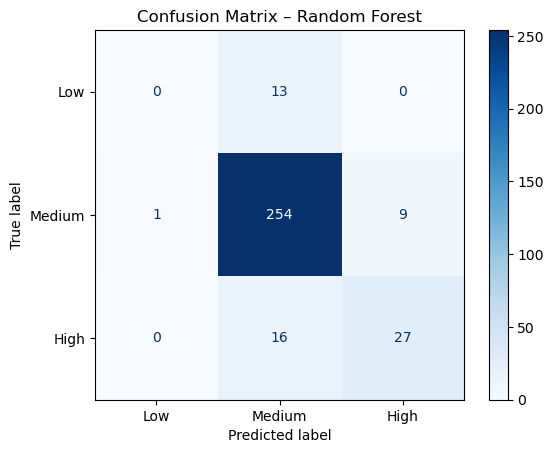

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Low", "Medium", "High"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()

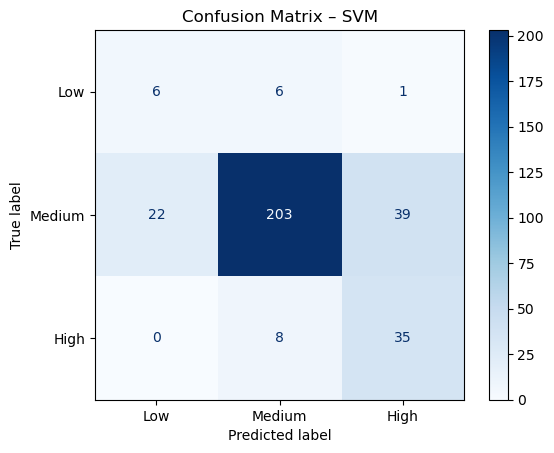

In [77]:
y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_svm = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=["Low", "Medium", "High"]
)

disp_svm.plot(cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()


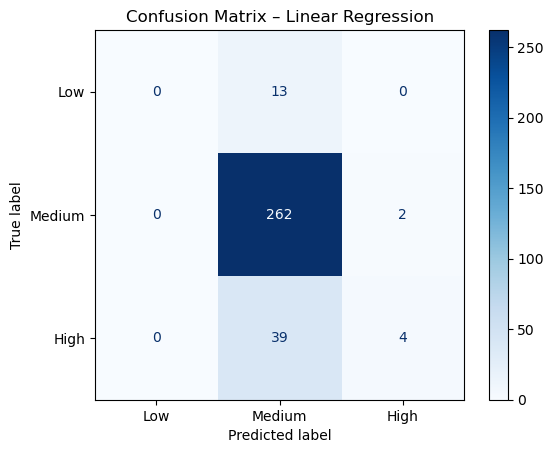

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Linear Regression predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lr = y_pred_lr.round().clip(0, 2).astype(int)

cm_lr = confusion_matrix(y_test, y_pred_lr)

disp_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=["Low", "Medium", "High"]
)

disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix – Linear Regression")
plt.show()


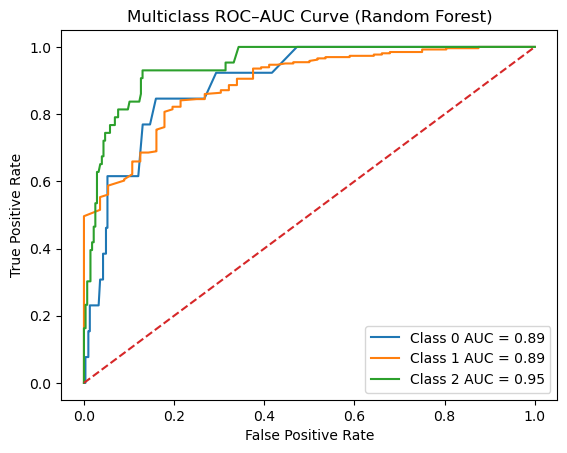

In [79]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_prob_rf = y_pred_rf_proba = rf_model.predict_proba(X_test)

# Number of classes
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (Random Forest)")
plt.legend()
plt.show()


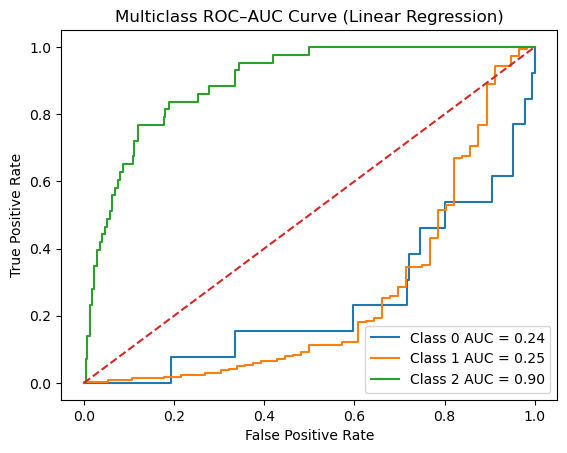

In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get continuous predictions
y_score_lr = lr_model.predict(X_test)

# Normalize scores to [0,1]
y_score_lr = (y_score_lr - y_score_lr.min()) / (y_score_lr.max() - y_score_lr.min())

plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (Linear Regression)")
plt.legend()
plt.show()

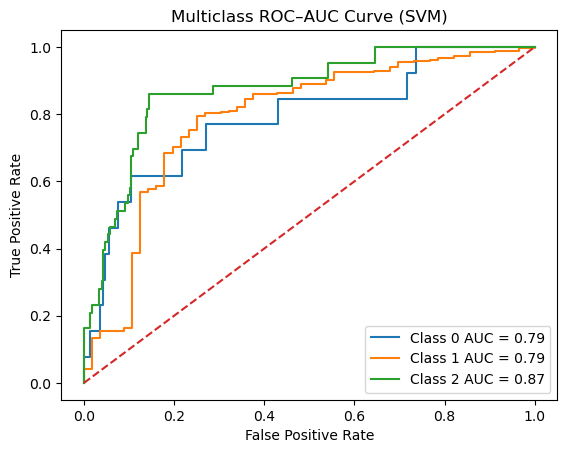

In [81]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get decision scores instead of probabilities
y_score_svm = svm_model.decision_function(X_test)

plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (SVM)")
plt.legend()
plt.show()